In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [3]:
df1 = pd.read_csv(
    r'C:\Users\Utilizador\Desktop\Uni\Estágios\2025 - InnoWave\Solar DG\solar_data\Plant_1_Generation_Data.csv',
    encoding='utf-8',
    engine='python',
    index_col='DATE_TIME'
)

In [4]:
df2 = pd.read_csv(
    r'C:\Users\Utilizador\Desktop\Uni\Estágios\2025 - InnoWave\Solar DG\solar_data\Plant_1_Weather_Sensor_Data.csv',
    encoding='utf-8',
    engine='python',
    index_col='DATE_TIME'
)

In [5]:
# Change df2 DATE_TIME format to match df1's
df2.index = pd.to_datetime(df2.index)

In [6]:
df2.index = df2.index.strftime('%d-%m-%Y %H:%M')
df2.index = pd.to_datetime(df2.index, format='%d-%m-%Y %H:%M')

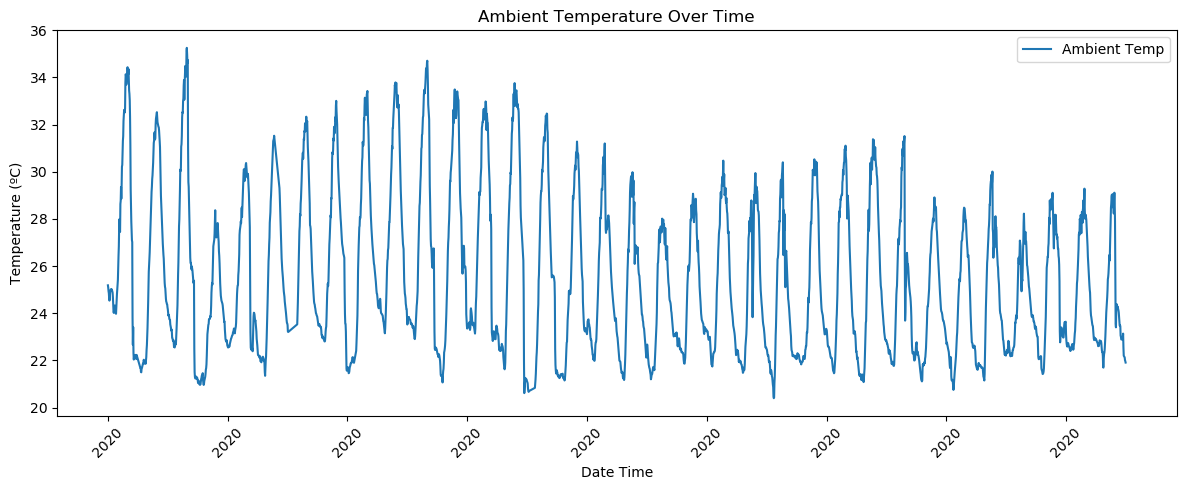

In [63]:
plt.figure(figsize=(12,5))
plt.plot(df2.index, df2['AMBIENT_TEMPERATURE'], label='Ambient Temp')

plt.gca().xaxis.set_major_locator(plt.MaxNLocator(10))
plt.xticks(rotation=45)

plt.xlabel('Date Time')
plt.ylabel('Temperature (ºC)')
plt.title('Ambient Temperature Over Time')
plt.legend()
plt.tight_layout()

plt.show()

In [64]:
df2_daily = df2.resample('D').mean()

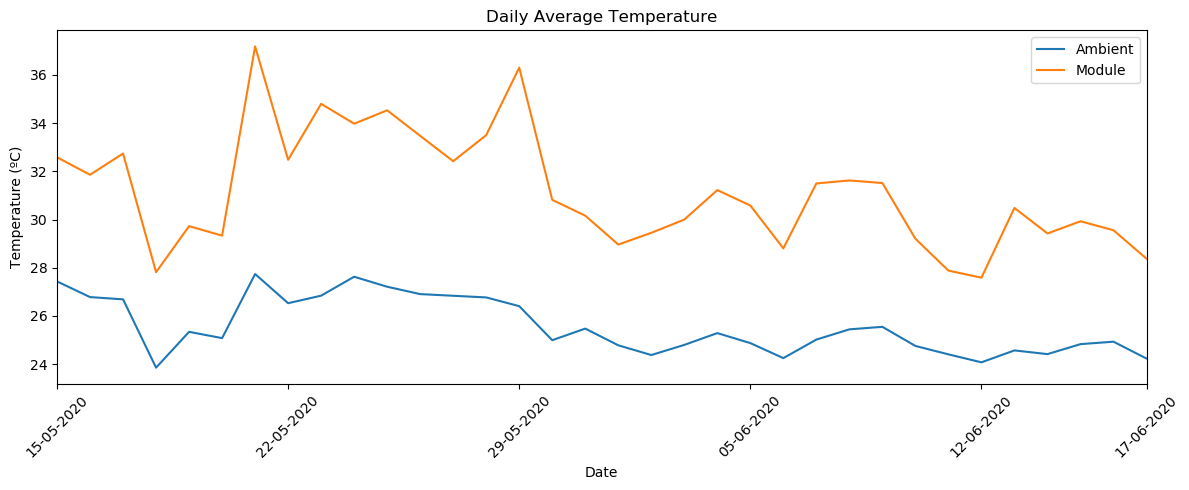

In [97]:
# Define the range from first to last
start_date = df2_daily.index.min()
end_date = df2_daily.index.max()

# Create tick locations
tick_locs = pd.date_range(start=start_date, end=end_date, freq='7D')

# Force first and last dates in the tick list (in case they're not included)
if start_date not in tick_locs:
    tick_locs = tick_locs.insert(0, start_date)
if end_date not in tick_locs:
    tick_locs = tick_locs.append(pd.DatetimeIndex([end_date]))

# Plot
plt.figure(figsize=(12, 5))
plt.plot(df2_daily.index, df2_daily['AMBIENT_TEMPERATURE'], label='Ambient')
plt.plot(df2_daily.index, df2_daily['MODULE_TEMPERATURE'], label='Module')

plt.xticks(tick_locs, rotation=45)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))

plt.xlabel('Date')
plt.ylabel('Temperature (ºC)')
plt.title('Daily Average Temperature')
plt.legend()

# Limit x-axis to start and end date exactly
plt.xlim(start_date, end_date)

plt.tight_layout()
plt.show()

In [95]:
df2_daily.head()

,PLANT_ID,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
2020-05-15,4135001,27.430823,32.582964,0.204699
2020-05-16,4135001,26.780538,31.858851,0.211951
2020-05-17,4135001,26.686727,32.740435,0.238869
2020-05-18,4135001,23.850938,27.814344,0.159026
2020-05-19,4135001,25.338021,29.725163,0.194031
